Импорт используемых библиотек

In [1]:
from Solve import solve_for_one_well_explicit
import matplotlib.pyplot as plt
import math as m
from well import Well
import numpy as np
import seaborn as sns
import time as t

Функция для выбора шага по пространству для равномерной сетки, чтобы все скважины попали в центры контрольных объемов

In [2]:
def choose_step(length, width, x_wells, y_wells):
    dx = dy = min(m.gcd(length, *x_wells), m.gcd(width, *y_wells))
    return dx, dy


Задание данных скважин: координаты по х и у, радиус ствола, постоянный дебит и номер

In [3]:
# данные для скважин скважины
wells = [
    Well(550, 255, 1.5, 800, 1),
    Well(700, 750, 1.5, 1000, 2),
    Well(100, 755, 1.5, -1000, 3),
    Well(550, 800, 1.5, -1000, 4),
]

Ввод входных значений

In [4]:
# Ввод входных значений
length, width = 1000, 1000  # [м] геометрические размеры рассчитываемой области
dx, dy = choose_step(length, width, [well.x_w for well in wells],
                     [well.y_w for well in wells])  # [м] шаг по направлениям
Nx, Ny = int(length / dx) + 1, int(width / dy) + 1  # количество элементов
X = np.linspace(0, length, Nx)
Y = np.linspace(0, width, Ny)
T = 10 * 365

B = 1.2  # Объемный коэффициент
h = 10  # толщина пласта

# параметры взяты плюс-минус от балды
viscosity = 10  # Вязкость [сПз] = 10e-3 [Па * с]
compressibility = 5 * 10e-9  # [1/Па] сжимаемость
permeability = 100  # [мД] проницаемость - скаляр
eta = 1.0
coef = - B * viscosity / 2 / np.pi / permeability / h  # вспомогательный коэффициент


Расчеты давлений

In [ ]:
pressure_start = np.full((Nx, Ny), 0.0)
pressure_start[0, :] = 0
pressure_start[-1, :] = 0
pressure_start[:, 0] = 0
pressure_start[:, -1] = 0
pressure = pressure_start.copy()
permeability_matrix = np.full((Nx, Ny), permeability)


In [5]:

begin = t.time()
for well in wells:
    # Используем явный метод
    well.pressure_field, well.pressure_well, well.time_well = solve_for_one_well_explicit(X.copy(), Y.copy(), well.x_w,
                                                                                          well.y_w, well.q, well.r_w,
                                                                                          coef, pressure_start.copy(),
                                                                                          T, eta)
    pressure += well.pressure_field
print(t.time() - begin)

[np.float64(-550.0), np.float64(-545.0), np.float64(-255.0), np.float64(-250.0)]
[np.float64(-700.0), np.float64(-695.0), np.float64(-750.0), np.float64(-745.0)]
[np.float64(-100.0), np.float64(-95.0), np.float64(-755.0), np.float64(-750.0)]
[np.float64(-550.0), np.float64(-545.0), np.float64(-800.0), np.float64(-795.0)]
67.00818467140198


Визуализация

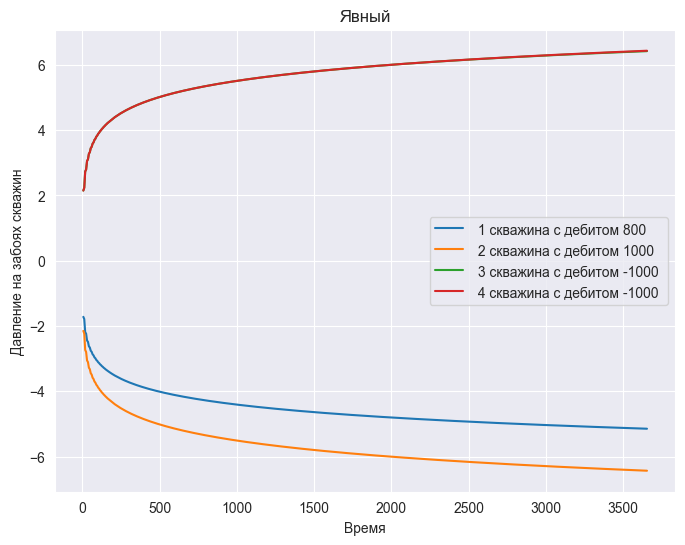

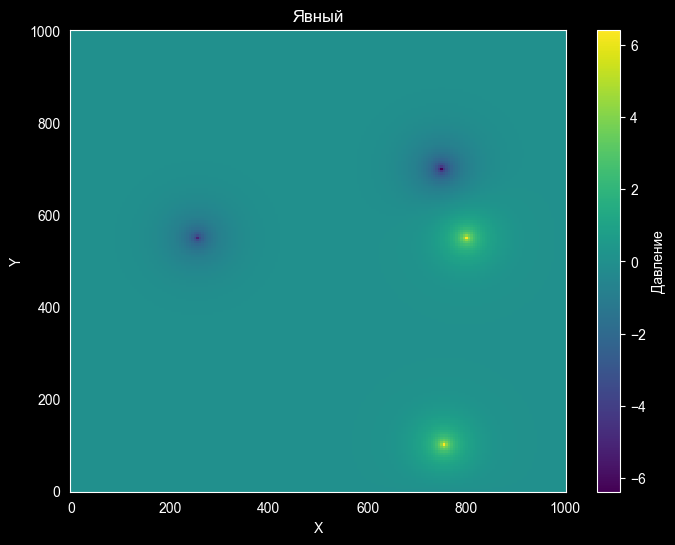

nvnn


In [6]:
fig, ax = plt.subplots(figsize=(8, 6), gridspec_kw={'hspace': 0})
for well in wells:
    ax.plot(well.time_well, well.pressure_well)
ax.set_xlabel('Время')
ax.set_title('Явный')
ax.set_ylabel('Давление на забоях скважин')
ax.legend([f' {well.number} скважина c дебитом {well.q} ' for well in wells])
plt.show()

#for style in plt.style.available == dark_background:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(X, Y, pressure, shading='auto', cmap='viridis')
cbar = plt.colorbar(cax, label='Давление')
ax.set_title(f'Распределение давления через {T} дней')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Явный')
plt.show()
print("nvnn")